In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("C://Users//yoona//Desktop//drug_number.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,DrugY
1,47,1,0,2,13.093,drugC
2,47,1,0,2,10.114,drugC
3,28,0,1,2,7.798,drugX
4,61,0,0,2,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,0,2,11.567,drugC
196,16,1,0,2,12.006,drugC
197,52,1,1,2,9.894,drugX
198,23,1,1,1,14.020,drugX


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


C:\Users\yoona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Drug', ylabel='count'>

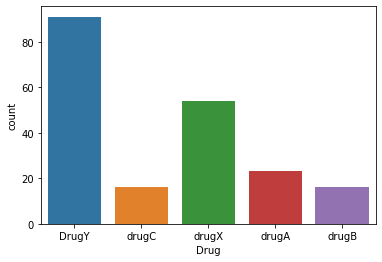

In [3]:
import seaborn as sns
sns.countplot(df['Drug'])

In [5]:
def multi(name):
    Drug_cat=1
    if name=='DrugY':
        Drug_cat=0
    elif name=='drugC':
        Drug_cat=1
    elif name=='drugX':
        Drug_cat=2
    elif name == 'drugB':
        Drug_cat=3
    elif name == 'drugA':
        Drug_cat=4
    return Drug_cat


df['Drug_number']=df['Drug'].apply(multi)           # 함수에 넣어 숫자로 변환해준다.
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_number
0,23,0,2,2,25.355,DrugY,0
1,47,1,0,2,13.093,drugC,1
2,47,1,0,2,10.114,drugC,1
3,28,0,1,2,7.798,drugX,2
4,61,0,0,2,18.043,DrugY,0
...,...,...,...,...,...,...,...
195,56,0,0,2,11.567,drugC,1
196,16,1,0,2,12.006,drugC,1
197,52,1,1,2,9.894,drugX,2
198,23,1,1,1,14.020,drugX,2


In [6]:
df_model = df.drop('Drug',axis=1)            # drop으로 drug 열 (axis = 1)을 제거한다
df_model

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_number
0,23,0,2,2,25.355,0
1,47,1,0,2,13.093,1
2,47,1,0,2,10.114,1
3,28,0,1,2,7.798,2
4,61,0,0,2,18.043,0
...,...,...,...,...,...,...
195,56,0,0,2,11.567,1
196,16,1,0,2,12.006,1
197,52,1,1,2,9.894,2
198,23,1,1,1,14.020,2


In [7]:
X = df_model.drop('Drug_number', axis = 1)     # 맨 끝에 'Drug number'만 빼고 그 앞에 모든 열을 X값으로 둔다.

# X=df_model[:,:-1]  이렇게 기존에 하던 방식대로 안하는 이유는 .values로 array 값으로 한게 아니라 pandas 데이터 형식이라 기존대로는 못씀

y=df_model.loc[:,'Drug_number']      # y의 경우 행은 다 가져오고, 열은 맨 끝에 한개만 가져오는거라 이렇게 작성 가능
y                                    # y = df_model['Drug_number']로 해줄수도 있다.

0      0
1      1
2      1
3      2
4      0
      ..
195    1
196    1
197    2
198    2
199    2
Name: Drug_number, Length: 200, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X                            #feature 
                                                    , y                          #target
                                                    , stratify = df.iloc[:,-1]   #층화추출법
                                                    , random_state = 1)          #난수고정

print(y_train,'\n')
print(y_test)

35     2
180    0
196    1
84     1
145    2
      ..
167    2
101    4
66     4
81     2
97     0
Name: Drug_number, Length: 150, dtype: int64 

197    2
131    0
40     0
11     0
85     3
26     0
38     2
95     2
118    4
99     0
176    4
193    1
21     0
27     2
178    0
22     0
78     4
34     2
31     3
177    0
59     0
67     2
163    0
12     0
168    0
147    4
164    0
136    3
64     3
18     1
55     1
117    2
52     0
44     2
63     2
24     0
191    4
47     1
162    2
4      0
140    4
19     0
146    2
135    2
172    0
29     0
60     0
171    2
75     0
143    0
Name: Drug_number, dtype: int64


In [10]:
model = RandomForestClassifier(n_estimators=180)   # 트리의 개수 기본은 10개
model.fit(X_train,y_train)     # 학습
prediction = model.predict(X_test)
# print(prediction == y_test)            # 예측 결과와 실제 y_test 정답을 비교

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.98


Accuracy is:  0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.75      1.00      0.86         3
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.98        50
   macro avg       0.95      0.99      0.96        50
weighted avg       0.98      0.98      0.98        50



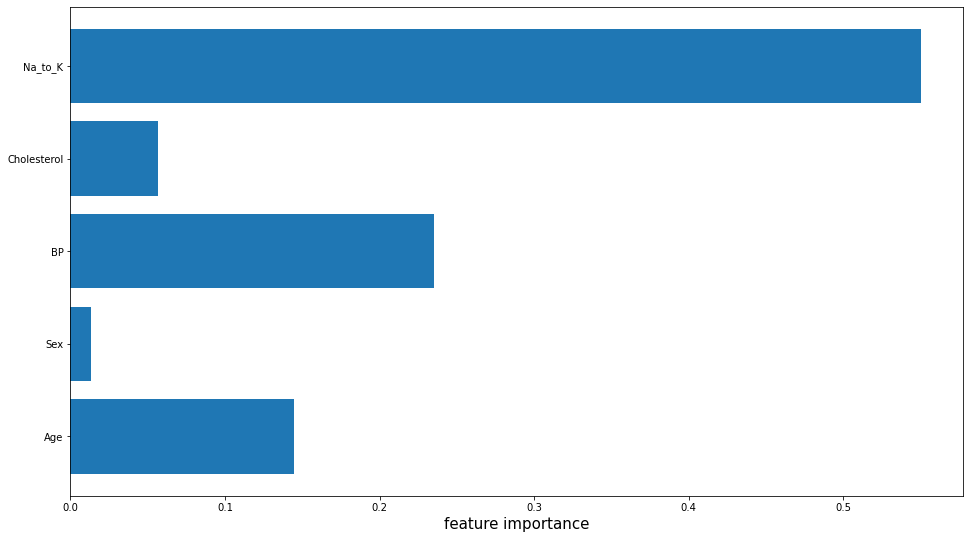

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score            # 그냥 정확도... score랑 동일
from sklearn.metrics import classification_report

print("Accuracy is: ", accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test))                      # support는 실제 정답에 해당 클래스가 몇개인지 수 : 1 class가 압도적으로 많다

feature_names = ['Age','Sex','BP','Cholesterol','Na_to_K']
n_feature = 5    # 피쳐 갯수
idx = np.arange(n_feature)

plt.figure(figsize=(16, 9))
plt.barh(idx, model.feature_importances_, align='center')
plt.yticks(idx, feature_names)
plt.xlabel('feature importance', size=15)
plt.show()

# 확실히 feature간 중요도를 보면 랜덤포레스트에서는 단일 트리보다 훨씬 많은 feature가 0이상의 중요도를 갖는다.
# 랜덤 포레스트의 무작위성은 단일 트리보다 더 넓은 시각에서 데이터를 바라볼 수 있다.

In [12]:
print(model.feature_importances_)

# feature importance가 선형적으로 더해지는게 아니라 각 feature의 중요도는 유지하되, 정확한 중요도 % 값은 달라진다.

# 분류 정확도도 98% ---> 100%로 향상됨

[0.14463371 0.01345255 0.23540466 0.05646641 0.55004267]


Test Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



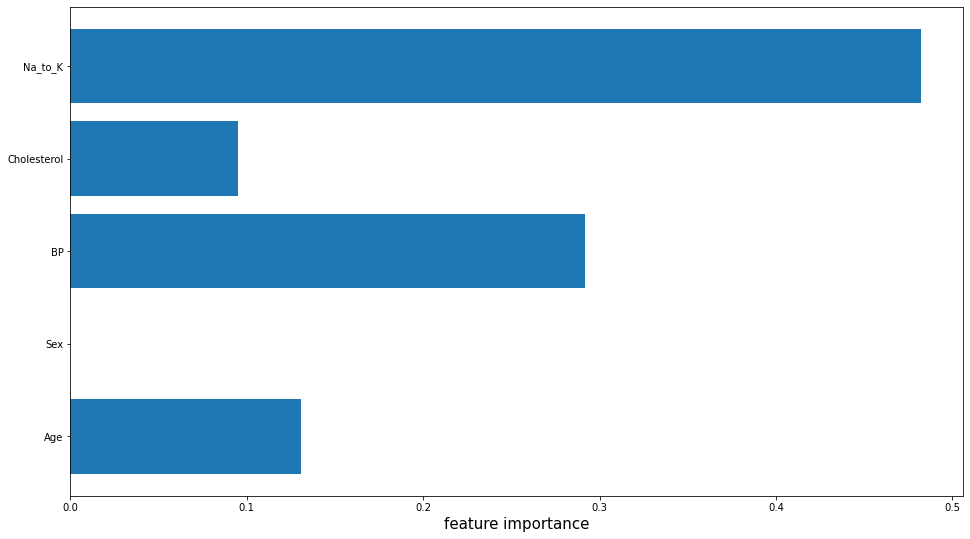

In [16]:
model = RandomForestClassifier(n_estimators=180, max_features = 5,  max_depth = 100)  # max_features = 5,  max_depth = 100 로 성능 올림
model.fit(X_train,y_train)     # 학습
prediction = model.predict(X_test)
print("Test Accuracy is: ", accuracy_score(prediction, y_test))
print(classification_report(prediction, y_test)) 

model.score(X_test,y_test)

plt.figure(figsize=(16, 9))
plt.barh(idx, model.feature_importances_, align='center')
plt.yticks(idx, feature_names)
plt.xlabel('feature importance', size=15)
plt.show()

Confusion matrix, without normalization
[[23  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  6]]
Normalized confusion matrix
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


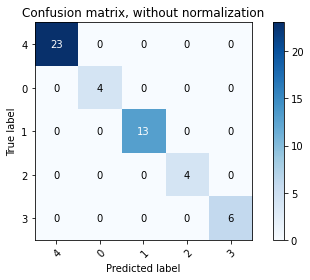

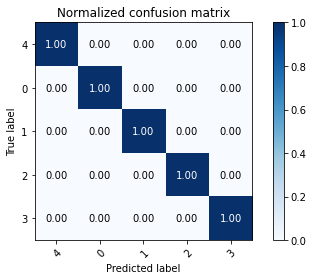

In [17]:
class_names = np.array(['0','1','2','3','4'], dtype='<U10')       # 최종 분류 모델이 1또는 2또는 3임
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# Confusion Matrix 시각화
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)-1]        # 원래는 없던 건데 -1 해준다
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# 정규화 안한 confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, title='Confusion matrix, without normalization')

# 정규화 한 confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()